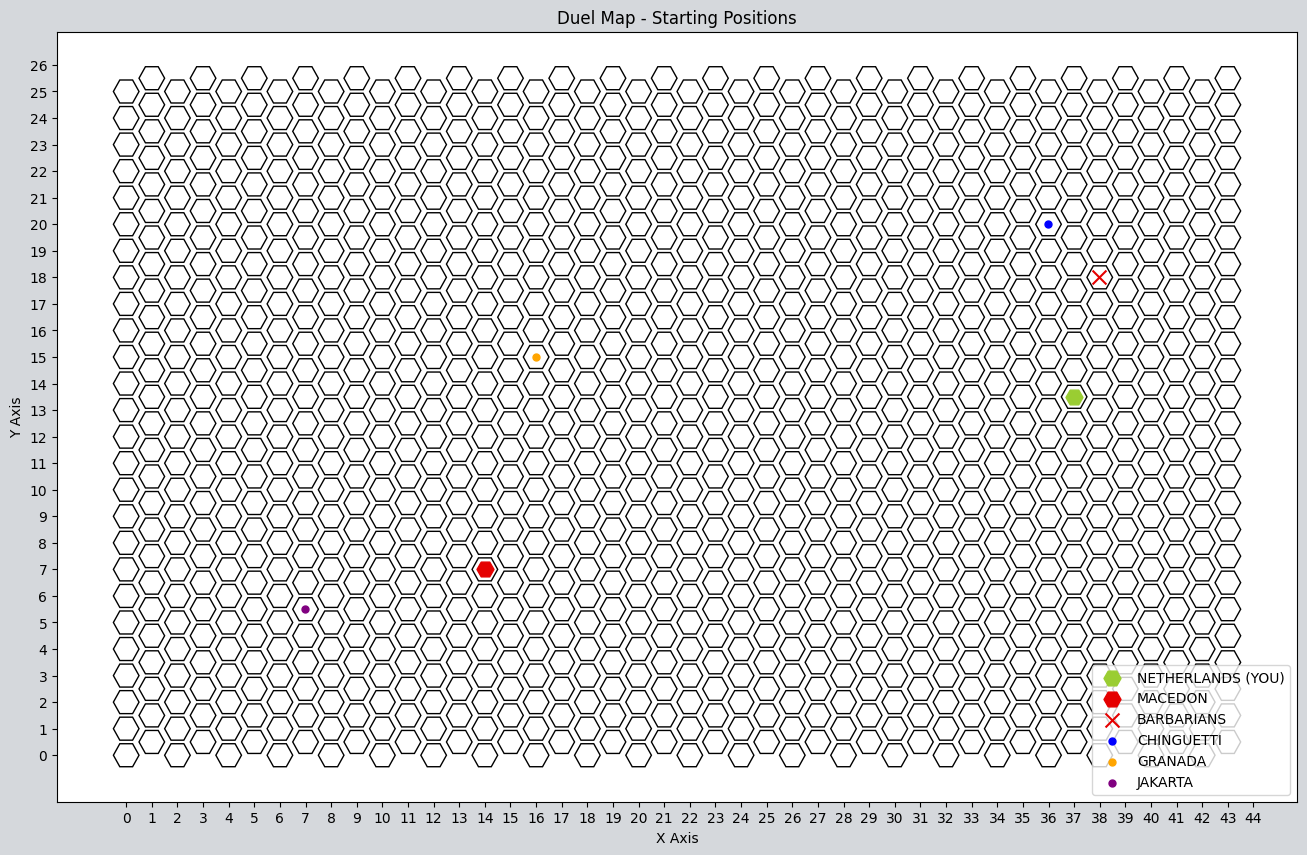

In [1]:
# To do - 
# City state and Barbarian plots
# List units of each player
# PLot movement of each player's unit

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from matplotlib.patches import RegularPolygon

# Human Player
player0 = {'civ': 'Player 0', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

# AI Full CIV
player1 = {'civ': 'Player 1', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

# City State 1
player2 = {'civ': 'Player 2', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

# City State 2
player3 = {'civ': 'Player 3', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

# City State 3
player4 = {'civ': 'Player 4', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

# Free Cities?
player62 = {'civ': 'Player 2', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

# Barbarians
player63 = {'civ': 'BARBARIANS', 'x_start': 0, 'y_start': 0, 'unit_count': 0,}

full_civ_players = [player0, player1]
city_state_players = [player2, player3, player4]
all_players = [player0, player1, player2, player3, player4, player62, player63]

# Function to determine whether number is even or not
def is_odd(n):
    return n % 2 == 1

# Function that draws the duel map
def plot_hexagon_grid(rows=27, cols=44, hex_size=0.5, dot_info=None):
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Distance between centers of two adjacent hexagons horizontally and vertically
    dx = 1
    dy = 1

    # Loop to create hexagons
    for row in range(rows):
        for col in range(cols):
            # Calculate the center position
            x = col * dx
            y = row * dy

            # Adjust every other row to interlock the hexagons
            if col % 2 == 1:
                y += dy / 2
            
            # Create the hexagon shape
            hexagon = RegularPolygon((x, y), numVertices=6, radius=hex_size, orientation=np.radians(30), edgecolor='k', facecolor='none')
            ax.add_patch(hexagon)

    # Plotting dots with specified coordinates and colors
    for dot in dot_info:
        plt.scatter(dot[0], dot[1], color=dot[2], label=dot[3], s=dot[4], marker=dot[5])  # dot[0] and dot[1] are x and y coordinates, dot[2] is the color, dot[3] is it's label, dot[4] is size, dot[5] is marker
    
    fig.patch.set_facecolor('#D5D8DC')  # You can use any color name or hex code

    # X and Y ticks
    x = range(0, 45)  # X values from 0 to 16
    y = range(0, 27)  # Y values as squares of X values
    plt.xticks(range(min(x), max(x)+1, 1), fontsize=10)
    plt.yticks(range(min(y), max(y) + 1, 1), fontsize=10)

    # X and Y labels
    plt.xlabel('X Axis')  # X-axis label
    plt.ylabel('Y Axis')  # Y-axis label
    plt.title('Duel Map - Starting Positions')  # Plot title

    plt.legend()


# GET PLAYER NAMES
player_name_string = "CIVILIZATION_LEVEL_FULL_CIV"
current_player = 0  # Start with player 1 (player_0)
with open('C:\\Users\\User\\AppData\\Local\\Firaxis Games\\Sid Meier\'s Civilization VI\\Logs\\GameCore.log', 'r') as file:
    for line in file:
        if player_name_string in line:
            name_pattern = r"Civilization - CIVILIZATION_([A-Za-z]+)\s"
            name_match = re.search(name_pattern, line)
            if name_match:
                name = str(name_match.group(1))
                full_civ_players[current_player]['civ'] = name

            current_player = (current_player + 1) % len(full_civ_players)  # This will toggle between 0 and 1 for two full_civ_players

                
# GET PLAYER COORDINATES
player_coord_start_string = "Map Script: Major Start X:"
current_player = 0  # Start with player 1
with open('C:\\Users\\User\\AppData\\Local\\Firaxis Games\\Sid Meier\'s Civilization VI\\Logs\\Lua.log', 'r') as file:
    for line in file:
        if line.startswith(player_coord_start_string):
            # Extract X coordinate
            x_pattern = r"Major Start X:\s*(\d+)"
            x_match = re.search(x_pattern, line)
            if x_match:
                x_number = int(x_match.group(1))      
                full_civ_players[current_player]['x_start'] = x_number
            
            # Extract Y coordinate
            y_pattern = r"Major Start Y:\s*(\d+)"
            y_match = re.search(y_pattern, line)
            if y_match:
                y_number = int(y_match.group(1))
                full_civ_players[current_player]['y_start'] = y_number
                        
            # Toggle to the next player for the next matching line
            current_player = (current_player + 1) % len(full_civ_players)  # This will toggle between 0 and 1 for two full_civ_players

# GET CITY STATE NAME
city_state_name_string = "CIVILIZATION_LEVEL_CITY_STATE"
current_city_state = 0  # Start with player 1 (player_0)                    
with open('C:\\Users\\User\\AppData\\Local\\Firaxis Games\\Sid Meier\'s Civilization VI\\Logs\\GameCore.log', 'r') as file:
    for line in file:
        if city_state_name_string in line:
            name_pattern = r"Civilization - CIVILIZATION_([A-Za-z]+)\s"
            name_match = re.search(name_pattern, line)
            if name_match:
                name = str(name_match.group(1))    
                city_state_players[current_city_state]['civ'] = name

            current_city_state = (current_city_state + 1) % len(city_state_players)  # This will toggle between 0 and 1 for two full_civ_players


# GET CITY STATE COORDS
# Searching for a specific string within the file content that contains relevant info"
city_state_coord_start_string = "Map Script: Minor Start X:"
current_player = 0  # Start with player 1
with open('C:\\Users\\User\\AppData\\Local\\Firaxis Games\\Sid Meier\'s Civilization VI\\Logs\\Lua.log', 'r') as file:
    for line in file:
        if line.startswith(city_state_coord_start_string):
            # Extract X coordinate
            x_pattern = r"Minor Start X:\s*(\d+)"
            x_match = re.search(x_pattern, line)
            if x_match:
                x_number = int(x_match.group(1))
                city_state_players[current_player]['x_start'] = x_number
            
            # Extract Y coordinate
            y_pattern = r"Minor Start Y:\s*(\d+)"
            y_match = re.search(y_pattern, line)
            if y_match:
                y_number = int(y_match.group(1))
                city_state_players[current_player]['y_start'] = y_number
                        
            # Toggle to the next player for the next matching line
            current_player = (current_player + 1) % len(city_state_players)  # This will toggle between 0 and 1 for two full_civ_players         


# GET BARBARIAN COORDS 'C:\\Users\\User\\Documents\\Python Scripts\\Civ6\\Civ game at the start of turn 2\\Barbarians.csv', header=None)
x_and_y = df[3][1]
x_barbarians = int(x_and_y[0:3])
y_barbarians = int(x_and_y[-2:])
player63['x_start'] = x_barbarians
player63['y_start'] = y_barbarians


# ADJUSTMENTS
# Adjust y axis to allign with grid if necessary
current_player = 0
for player in all_players:
    if is_odd(all_players[current_player]['x_start']):
        all_players[current_player]['y_start'] += 0.5
    
    # Toggle to the next player for the next matching line
    current_player = (current_player + 1) % len(all_players)  # This will toggle between 0 and 1 for two full_civ_players        

# Small adjustment to centre the plotted hexagons better
current_player = 0
for player in all_players:
        all_players[current_player]['x_start'] -= 0.01

        # Toggle to the next player for the next matching line
        current_player = (current_player + 1) % len(all_players)  # This will toggle between 0 and 1 for two full_civ_players    

plot_hexagon_grid(26, 44, dot_info=
                  [(player0['x_start'], player0['y_start'], 'yellowgreen', (player0['civ'] + ' (YOU)'), 150, "H"),
                   (player1['x_start'], player1['y_start'], '#E50000', player1['civ'], 150, "H"),
                   (player63['x_start'], player63['y_start'], '#E50000', player63['civ'], 100, "x"),
                   (player2['x_start'], player2['y_start'], '#0000FF', player2['civ'], 100, "."),
                   (player3['x_start'], player3['y_start'], 'orange', player3['civ'], 100, "."),
                   (player4['x_start'], player4['y_start'], 'purple', player4['civ'], 100, "."),
                   ])




In [2]:
# C:/Users/User/AppData/Local/Firaxis Games/Sid Meier's Civilization VI/Logs

: 